# Fourier methods for solvinge PDEs
In the problem set you looked the diffusion advection equation and how thios can be solved by Fourier methods. You solved this for an initial condition of a point source of dye.

In the second part you looked at generalising this method and found that for a general initial condition the evolution can be expressed through convolutions. This workbook allows you to investigate some standard example numerically.

## Initialisation code

These few cells produce some functions for finding (to a good approximation) the various functions that we're interested in.  You don't need to understand the details of how any of this works, but feel free to ask.

**You need to run all the cells in this section for anything to work.**

In [1]:
%matplotlib inline
from matplotlib import pyplot
import matplotlib
import scipy.signal
import numpy as np
import ipywidgets

### Initial conditions

In [2]:
def top_hat(x, width, amplitude = 1, centre = 0):
  r"""
    Generate a top hat function 
    """
  th = np.zeros(x.shape)
  th[(x >= centre - width/2) & (x < centre + width/2)] = amplitude
  return th

def top_hat2D(x, y, width_x, width_y, centre = 0, amplitude = 1):
  return top_hat(x, width_x, amplitude, centre) * top_hat(y, width_y, amplitude, centre)

def approximateDiracDelta(x, amplitude = 1, centre = 0):
  r"""
    Generate a narrow top hat to approximate a delta
    """
  return top_hat(x, 1, amplitude, centre)

def approximateDiracDelta2D(x, y, amplitude = 1, centre = 0):
  r"""
    Generate a narrow top hat to approximate a delta
    """
  return top_hat2D(x, y, 1, 1, centre, amplitude)

def gauss_function(x, a, x0, sigma):
  r"""
    Generate a narrow top hat to approximate a delta
    """
  return a / (np.sqrt(2 * np.pi) * sigma) * np.exp(-(x-x0)**2/(2*sigma**2))

def gauss_function2D(x,y,a,x0,y0,sigma_x, sigma_y):
  z = (1/(2*np.pi*sigma_x*sigma_y) * np.exp(-((x-x0)**2/(2*sigma_x**2)
     + (y-y0)**2/(2*sigma_y**2))))
  return z


### Diffusion equations

In [3]:
def diffusion1D(x, D, t = 0, x0 = 0, a = 1):
  r'''
  returns a Gaussian this is to be convolved with the initial condition
  '''
  #if t == 0: # treat time point one as a delta
  #  g = approximateDiracDelta(x)
  #else:
  sigma = np.sqrt(2 * D * t)
  g = gauss_function(x, a, x0, sigma)
  return g

def diffusion2D(x, y, Dx, Dy, t = 0, x0 = 0, y0= 0, a = 1):
  r'''
  returns a Gaussian this is to be convolved with the initial condition
  '''
  #if t == 0: # treat time point one as a delta
  #  g = approximateDiracDelta2D(x, y, amplitude = 1, centre = 0)
  #else:
  sigma_x = np.sqrt(2 * Dx * t)
  sigma_y = np.sqrt(2 * Dy * t)
  g = gauss_function2D(x,y,a,x0,y0,sigma_x, sigma_y)
  return g

def getDiffusionAsFunctionOfTime(xs, ts, n0, g, D, c = 0):
  gs = g(xs, D, ts, x0 = c * ts, a = 1)
  diffusion = np.apply_along_axis(lambda m: np.convolve(m, n0, mode='same'), axis=0, arr=gs)
  return diffusion



In [4]:
def diffusionplot(xs, n0, g, t, D = 10, x0 = 0):
    r"""
    Plot a function ``f`` and its Legendre-, Taylor- and Fourier-series
    approximations of the given order on the interval ..math:`[-1, 1)`.
    """
    cm = matplotlib.cm.viridis
    _, axes = pyplot.subplots()
    gs = g(xs, D, t, x0 = x0)  # np.array([for x in xs])
    diffusion = np.convolve(gs, n0, mode = 'same')
    axes.plot(xs, diffusion, label="n(x,t)", linewidth=2)
    axes.plot(xs, gs, label="g(x,t)", linewidth=2, dashes=(5, 5))
    axes.plot(xs, n0, label="n_0(x)", linewidth=2, dashes=(5, 5))
    axes.set_xlim((xs[0] - 0.03*(xs[-1]-xs[0]), xs[-1] + 0.03*(xs[-1]-xs[0])))
    axes.set_xlabel('x')
    axes.set_ylabel('n(x,t)')
    mn, mx = np.min(n0), np.max(n0)
    axes.legend()

def diffusionplot2D(xs, ys, n0, g, t, Dx = 10, Dy = 1):
  r"""
  Plot a function ``f`` and its Legendre-, Taylor- and Fourier-series
  approximations of the given order on the interval ..math:`[-1, 1)`.
  """
  cm = matplotlib.cm.viridis
  _, axes = pyplot.subplots(figsize = [10,10])
  gs = g(xs, ys, Dx, Dy, t)  # np.array([for x in xs])
  diffusion = scipy.signal.convolve2d(gs, n0, mode = 'same')
  axes.contourf(x, y, diffusion, cmap='Blues')

def diffusionPlotTime(x,xs,ts,diffusion):
  _, axes = pyplot.subplots()
  axes.plot(ts[xs==x], diffusion[xs==x])
  mn, mx = np.min(diffusion), np.max(diffusion)
  axes.set_ylim((mn - 0.1*(mx-mn), mx + 0.1*(mx-mn)))

# Investigating diffusion with different initial conditions

## Infinitely small point (delta function)

interactive(children=(IntSlider(value=25, description='t', max=50, min=1), Output()), _dom_classes=('widget-in…

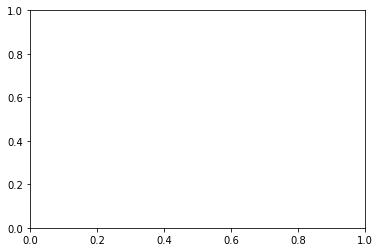

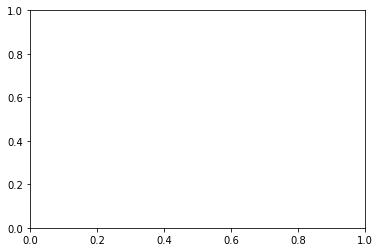

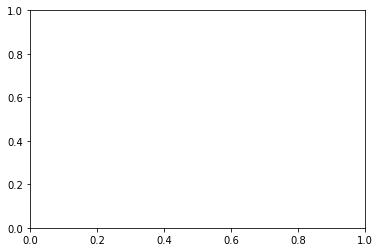

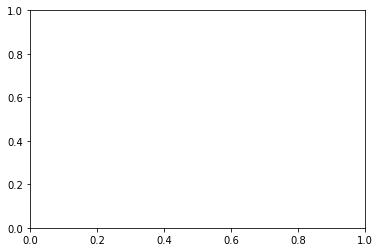

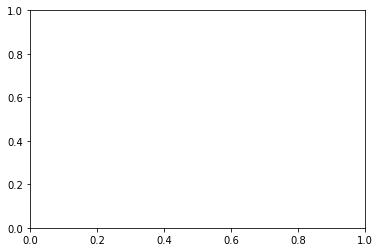

In [5]:
xs = np.linspace(-30, 30, 101)

ipywidgets.interact(
    lambda t: diffusionplot(xs, approximateDiracDelta(xs), diffusion1D, t, D = 0.1, x0 = 0),
    t=(1, 50, 1),
);

## Top hat function

interactive(children=(IntSlider(value=25, description='t', max=50, min=1), Output()), _dom_classes=('widget-in…

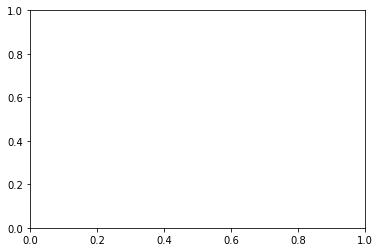

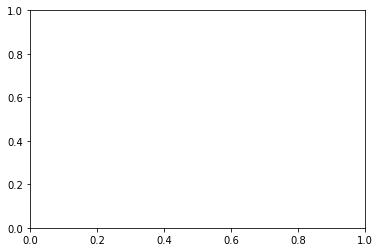

In [6]:
xs = np.linspace(-50, 50, 101)

ipywidgets.interact(
    lambda t: diffusionplot(xs, top_hat(xs, 10, 1), diffusion1D, t, D = 0.1),
    t=(1, 50, 1),
);

## Two points next to one another
Consider two infinitely small ink drops in water seperated by distance r. If the ink diffusesd with constant D consider the time at which the two ink drops become indistiguishable.

**Note:** There are a range of definitions on when two neighbouring Gaussians become indistinguishable. For simplicity consider two Gaussians (of amplitude A) to be seperate when the sum of the two Gaussians at x = 0 is 80 % of the peak amplitude. 

interactive(children=(IntSlider(value=50, description='t', min=1), Output()), _dom_classes=('widget-interact',…

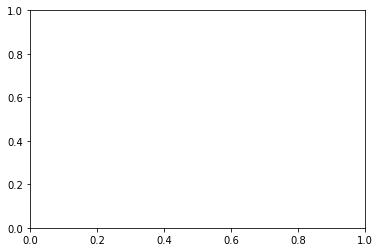

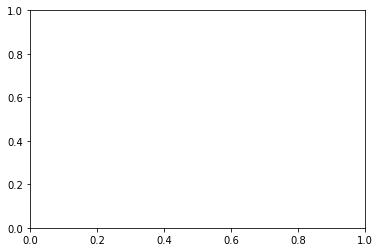

In [7]:
xs = np.linspace(-30, 30, 101)

ipywidgets.interact(
    lambda t: diffusionplot(xs, approximateDiracDelta(xs, centre = -5) + approximateDiracDelta(xs, centre = 5), diffusion1D, t, D = 0.1),
    t=(1, 100, 1),
);

# Diffusion in 2D with different coefficients

In [8]:
size = 100
x = np.linspace(-100, 100, size)
y = np.linspace(-100, 100, size)
x, y = np.meshgrid(x, y)

width_x = 15
width_y = 100

D_x = 100
D_y = 2

ipywidgets.interact(
    lambda t: diffusionplot2D(x,y, top_hat2D(x, y, width_x, width_y), diffusion2D, t, D_x, D_y),
    t=(1, 50, 1),
);

interactive(children=(IntSlider(value=25, description='t', max=50, min=1), Output()), _dom_classes=('widget-in…

# Diffusion advection
The above methods can be applied in the diffusion advection problem from the problem sheet. Below are examples of n(x,t)  

## Spatial profile at different times
### Diffusion from a point

In [9]:
xs = np.linspace(-30, 30, 101)
c = 0.2

ipywidgets.interact(
    lambda t: diffusionplot(xs, approximateDiracDelta(xs), diffusion1D, t, D = 0.1, x0 = c * t),
    t=(0, 50, 1),
);

interactive(children=(IntSlider(value=25, description='t', max=50), Output()), _dom_classes=('widget-interact'…

## Temporal profile at different positions
### Diffusion from a point

In [10]:
width = 10
size = 300
D = 1
c = 0.5

xs = np.arange(-100, 100)
n0 = approximateDiracDelta(xs)
ts = np.arange(1, 201)
xs, ts = np.meshgrid(xs, ts)
diffusionDD = getDiffusionAsFunctionOfTime(xs, ts, n0, diffusion1D, D, c)


ipywidgets.interact(
    lambda x: diffusionPlotTime(x,xs,ts,diffusionDD),
    x=(np.min(xs), np.max(xs), 1),
);

interactive(children=(IntSlider(value=-1, description='x', max=99, min=-100), Output()), _dom_classes=('widget…

### Diffusion from a top hat

In [11]:
width = 10
size = 300
D = 1
c = 0.5

xs = np.arange(-100, 100)
n0 = top_hat(xs, width, amplitude = 1, centre = 0)
ts = np.arange(1, 201)
xs, ts = np.meshgrid(xs, ts)
diffusionTH = getDiffusionAsFunctionOfTime(xs, ts, n0, diffusion1D, D, c)


ipywidgets.interact(
    lambda x: diffusionPlotTime(x,xs,ts,diffusionTH),
    x=(np.min(xs), np.max(xs), 1),
);


interactive(children=(IntSlider(value=-1, description='x', max=99, min=-100), Output()), _dom_classes=('widget…